In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
(X_Train,_),(_,_) = mnist.load_data()

In [3]:
print(X_Train.shape)


(60000, 28, 28)


In [4]:
# Normalize 
X_Train = (X_Train.astype('float32')-127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [5]:
X_Train  = X_Train.reshape(-1,28*28)
print(X_Train.shape)

(60000, 784)


In [0]:
EPOCHS = 60
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)
HALF_BATCH_SIZE = 128
NOISE_DIM = 100
adam = Adam(lr=2e-4,beta_1=0.5)

In [7]:
# Generator
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

# Compile
generator.compile(loss='binary_crossentropy',optimizer=adam)

generator.summary()


W0717 09:21:15.856131 140106149959552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 09:21:15.861295 140106149959552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 09:21:15.865078 140106149959552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 09:21:15.932235 140106149959552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 09:21:15.942893 140106149959552 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [8]:
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Combined Model (Geneerator + Discriminator) -> Functional API
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generator_output = generator(gan_input)
gan_output = discriminator(generator_output)

model = Model(input=gan_input,output=gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


In [0]:
def showImgs(epoch):
    noise = np.random.normal(0,1,size=(100,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(-1,28,28)
    
    #Display the Images
    plt.figure(figsize=(10,10))
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],cmap='gray',interpolation='nearest')
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    plt.savefig("images/gan_output_{0}.png".format(epoch+1))

W0717 09:21:16.218479 140106149959552 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D Loss 151.1522 G loss 221.2819 


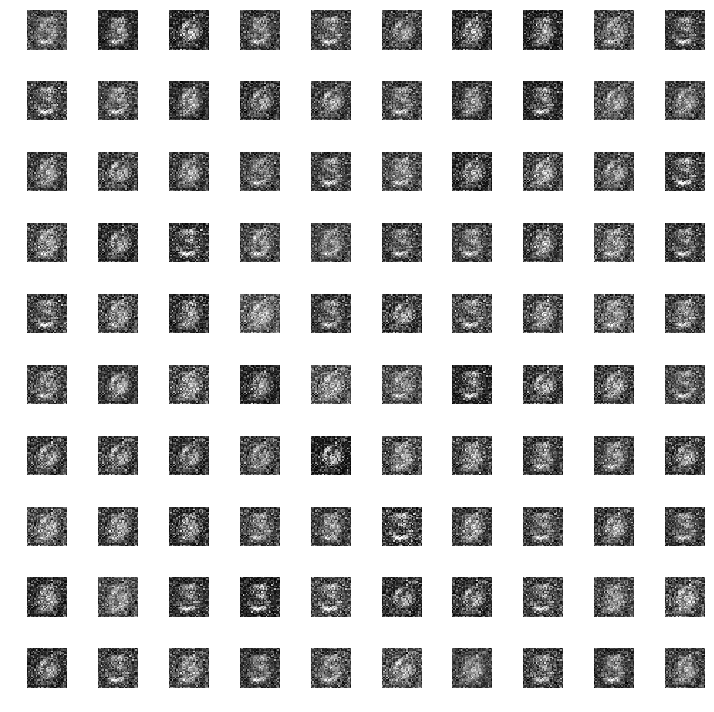

Epoch 2 D Loss 151.9202 G loss 237.4992 
Epoch 3 D Loss 147.2915 G loss 264.1484 
Epoch 4 D Loss 144.1042 G loss 268.1004 
Epoch 5 D Loss 139.4184 G loss 288.2243 
Epoch 6 D Loss 135.9022 G loss 303.8063 


<Figure size 432x288 with 0 Axes>

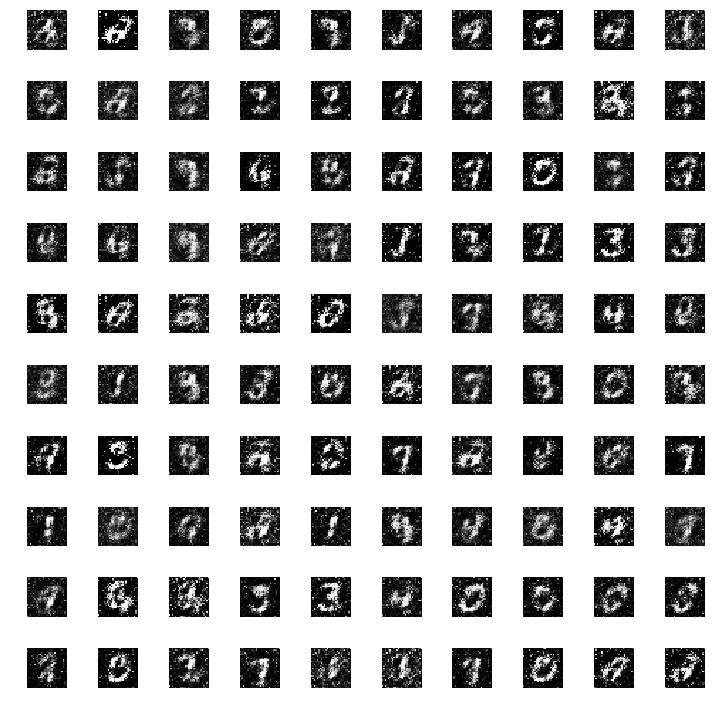

Epoch 7 D Loss 133.2453 G loss 304.3994 
Epoch 8 D Loss 135.0117 G loss 298.0060 
Epoch 9 D Loss 139.5315 G loss 281.5815 
Epoch 10 D Loss 141.9327 G loss 275.5894 
Epoch 11 D Loss 145.5806 G loss 262.4417 


<Figure size 432x288 with 0 Axes>

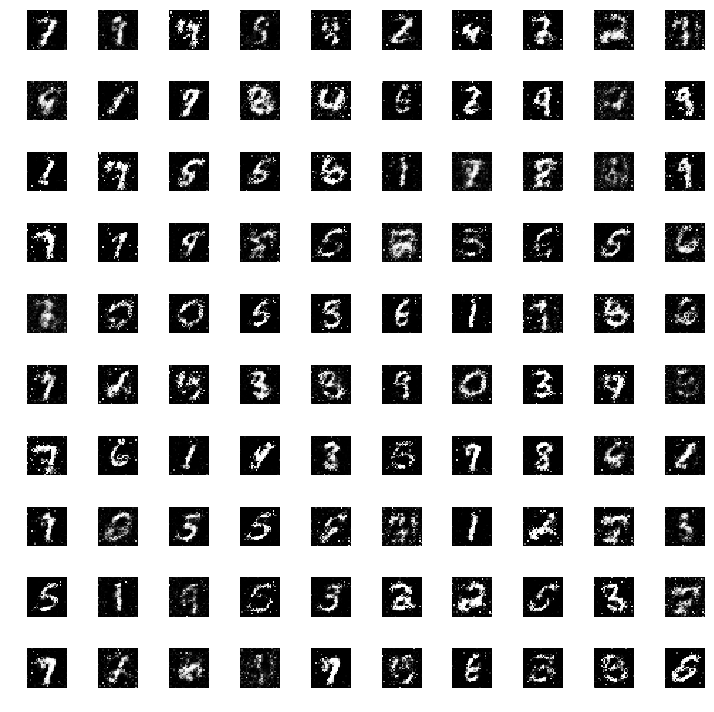

Epoch 12 D Loss 149.2865 G loss 248.0750 
Epoch 13 D Loss 148.5518 G loss 244.8362 
Epoch 14 D Loss 149.2098 G loss 244.2683 
Epoch 15 D Loss 150.8677 G loss 239.9969 
Epoch 16 D Loss 150.6575 G loss 242.9269 


<Figure size 432x288 with 0 Axes>

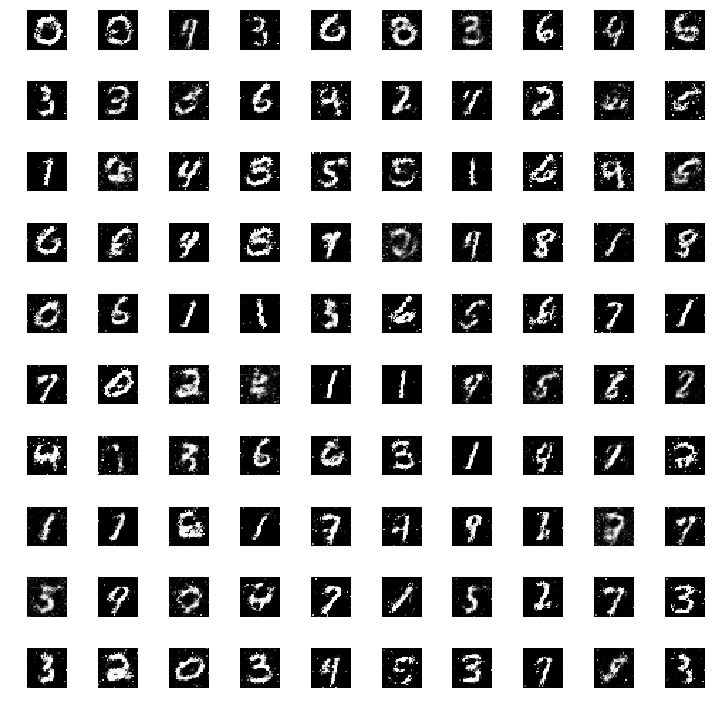

Epoch 17 D Loss 150.9951 G loss 240.8112 
Epoch 18 D Loss 151.3484 G loss 240.9267 
Epoch 19 D Loss 151.1133 G loss 239.6809 
Epoch 20 D Loss 151.7965 G loss 239.7306 
Epoch 21 D Loss 151.6662 G loss 239.1058 


<Figure size 432x288 with 0 Axes>

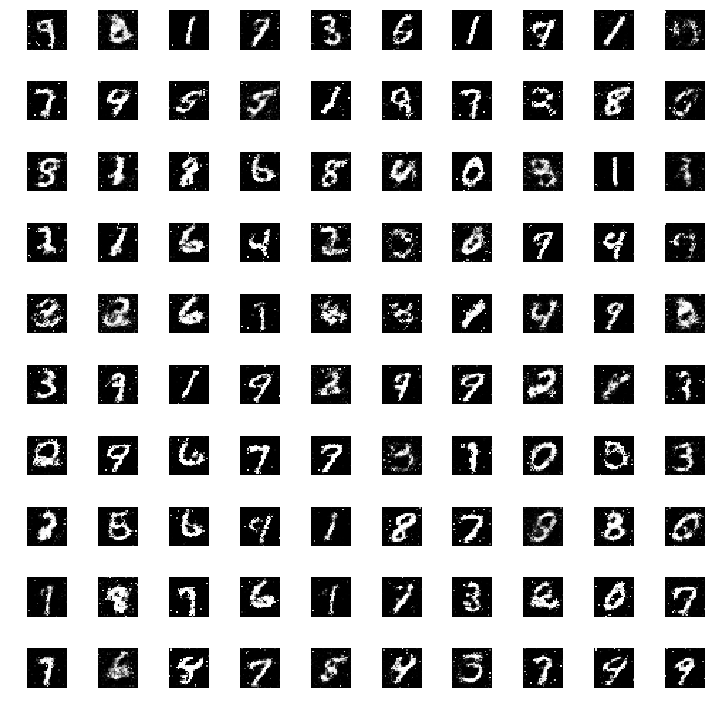

Epoch 22 D Loss 152.0013 G loss 237.5384 
Epoch 23 D Loss 152.3291 G loss 236.9232 
Epoch 24 D Loss 152.5115 G loss 236.6934 
Epoch 25 D Loss 152.1051 G loss 237.8494 
Epoch 26 D Loss 152.5971 G loss 239.1780 


<Figure size 432x288 with 0 Axes>

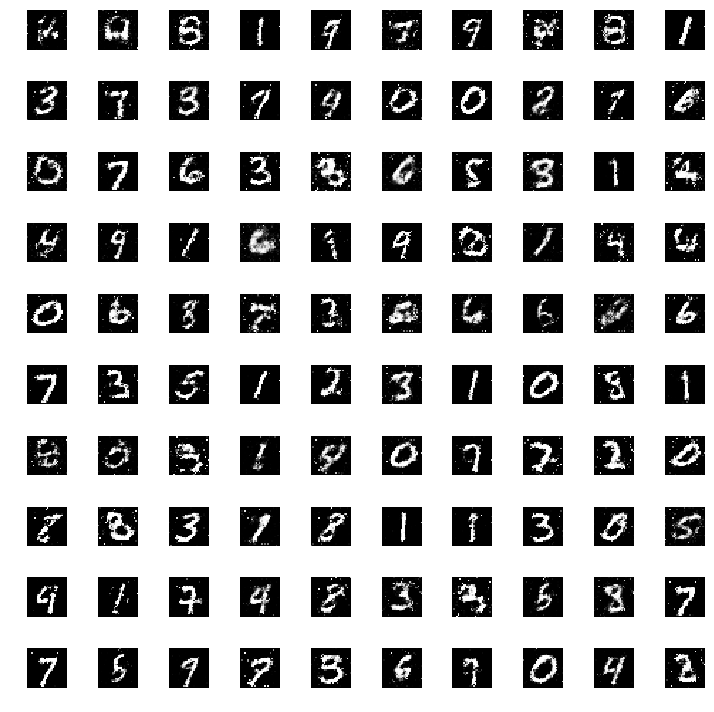

Epoch 27 D Loss 152.4682 G loss 238.1204 
Epoch 28 D Loss 152.6074 G loss 238.3015 
Epoch 29 D Loss 152.5968 G loss 237.2509 
Epoch 30 D Loss 153.2060 G loss 236.6627 
Epoch 31 D Loss 153.1496 G loss 237.7902 


<Figure size 432x288 with 0 Axes>

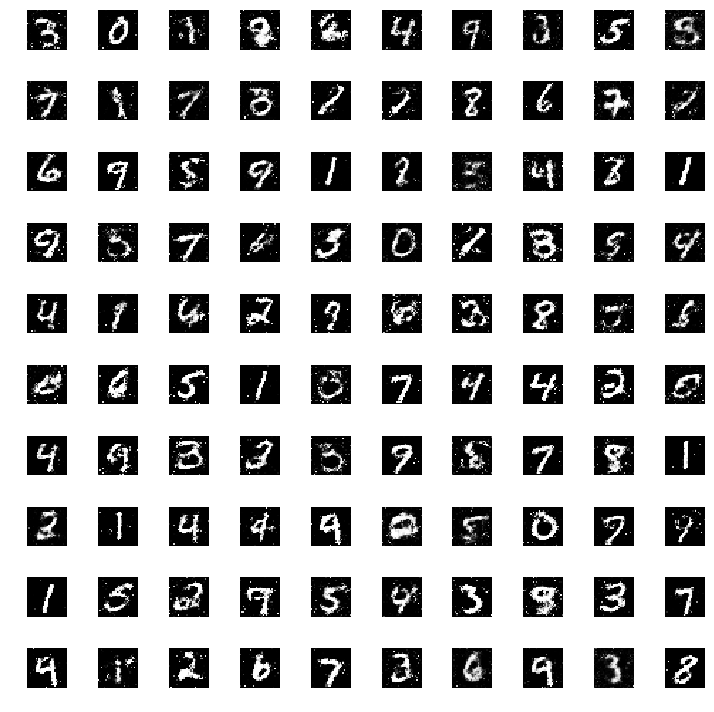

Epoch 32 D Loss 153.2477 G loss 237.0643 
Epoch 33 D Loss 153.5245 G loss 236.6880 
Epoch 34 D Loss 153.1959 G loss 236.3394 
Epoch 35 D Loss 153.2631 G loss 236.4056 
Epoch 36 D Loss 153.3845 G loss 237.5911 


<Figure size 432x288 with 0 Axes>

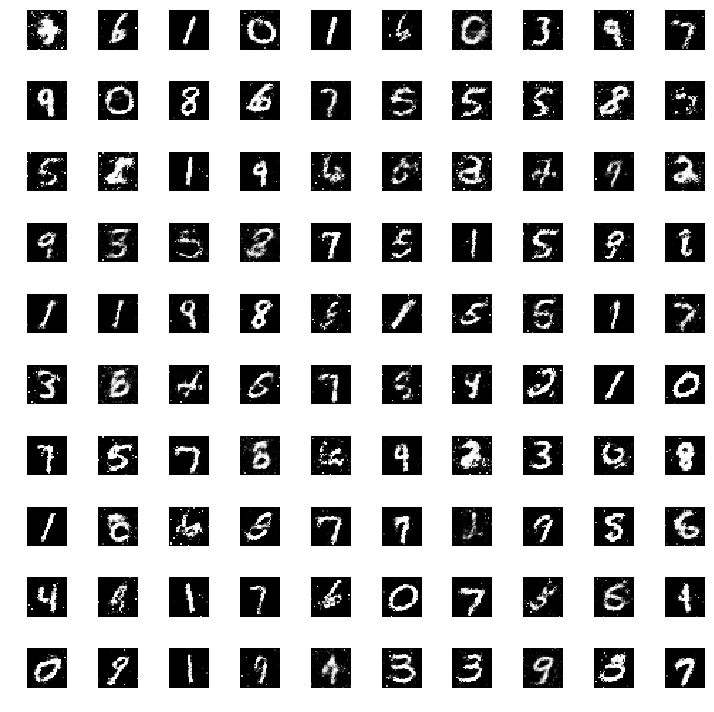

Epoch 37 D Loss 153.2526 G loss 235.6839 
Epoch 38 D Loss 153.5756 G loss 235.5542 
Epoch 39 D Loss 153.3933 G loss 238.6742 
Epoch 40 D Loss 153.1797 G loss 237.6227 
Epoch 41 D Loss 153.3414 G loss 238.0238 


<Figure size 432x288 with 0 Axes>

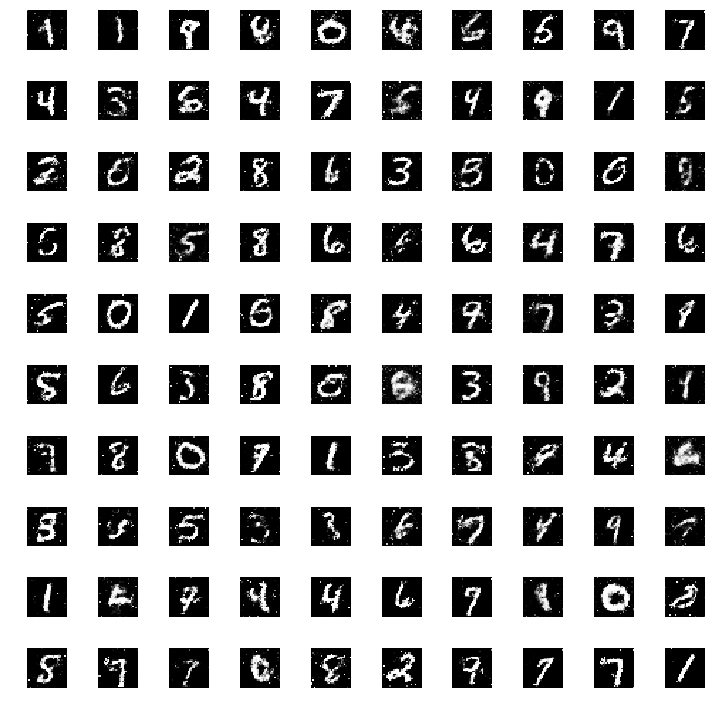

Epoch 42 D Loss 153.4533 G loss 237.4516 
Epoch 43 D Loss 153.8349 G loss 236.3169 
Epoch 44 D Loss 153.4941 G loss 235.0978 
Epoch 45 D Loss 153.6665 G loss 237.2671 
Epoch 46 D Loss 153.9308 G loss 235.4194 


<Figure size 432x288 with 0 Axes>

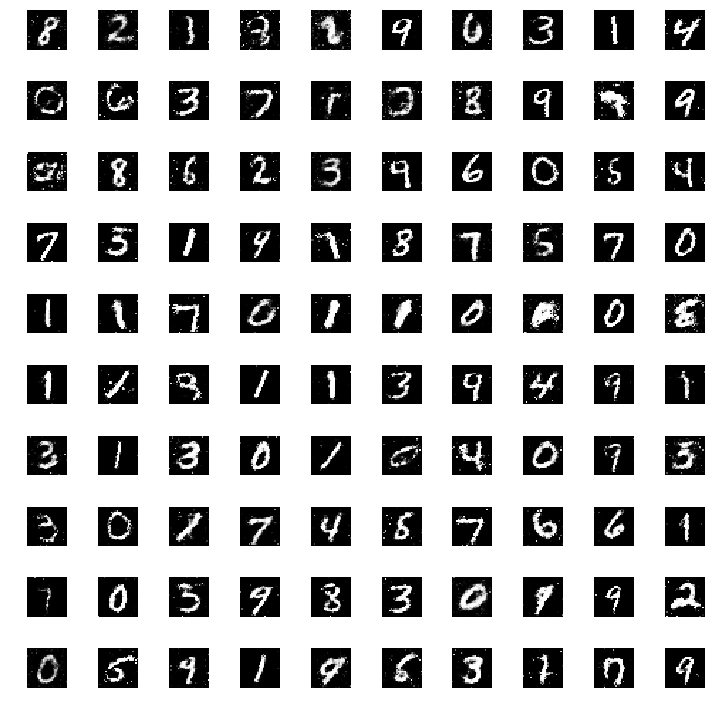

Epoch 47 D Loss 153.8587 G loss 236.3746 
Epoch 48 D Loss 153.9844 G loss 237.1277 
Epoch 49 D Loss 154.0875 G loss 238.1690 
Epoch 50 D Loss 154.2319 G loss 235.6670 
Epoch 51 D Loss 153.7920 G loss 235.8532 


<Figure size 432x288 with 0 Axes>

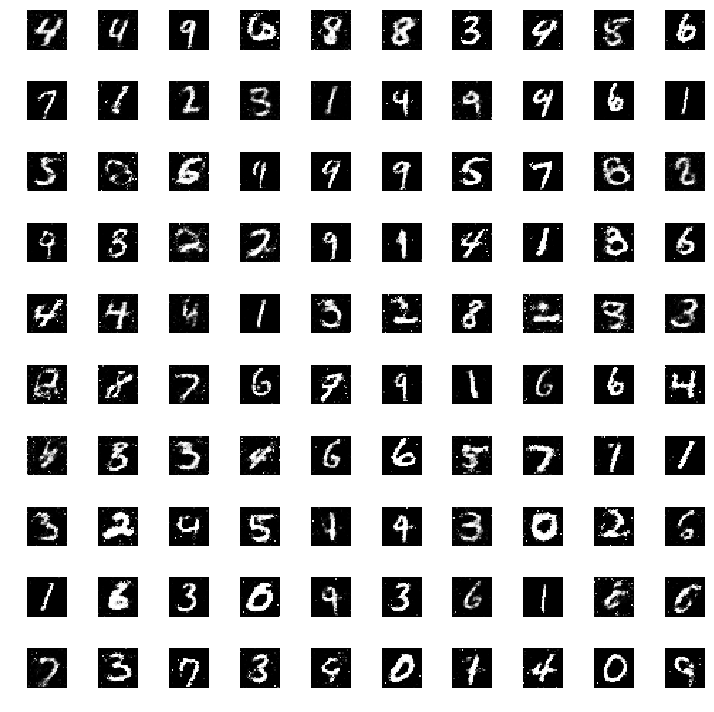

Epoch 52 D Loss 154.0840 G loss 235.5999 
Epoch 53 D Loss 153.7284 G loss 236.5060 
Epoch 54 D Loss 153.9133 G loss 236.2158 
Epoch 55 D Loss 153.9745 G loss 237.5083 
Epoch 56 D Loss 154.3273 G loss 237.6495 


<Figure size 432x288 with 0 Axes>

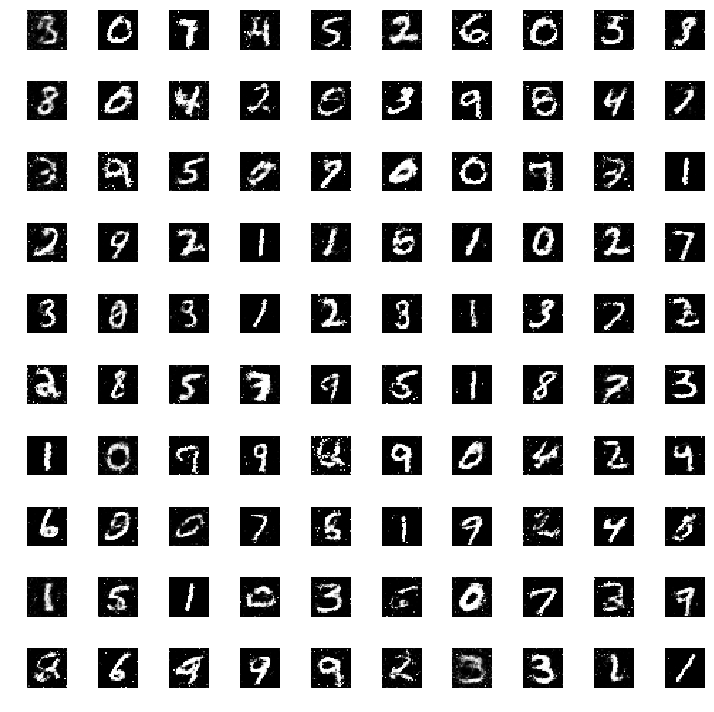

Epoch 57 D Loss 154.5296 G loss 237.2847 
Epoch 58 D Loss 153.9780 G loss 236.4698 
Epoch 59 D Loss 154.3571 G loss 235.9300 
Epoch 60 D Loss 154.5695 G loss 236.5002 


<Figure size 432x288 with 0 Axes>

In [11]:
d_losses = []
g_losses =  []

# Training Loop
for epoch in range(EPOCHS):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    
    # Mini Batch
    for step in range(NO_OF_BATCHES):
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate fake images assuming generator is frozen
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        # Labels
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        #Train on Real and Fake Images
        d_real_loss = discriminator.train_on_batch(real_imgs,real_y)
        d_fake_loss = discriminator.train_on_batch(fake_imgs,fake_y)
        
        d_loss = 0.5*d_real_loss + 0.5*d_fake_loss
        epoch_d_loss += d_loss
        
        # Train Generator
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    d_losses.append(epoch_d_loss)
    g_losses.append(epoch_g_loss)
        
    print("Epoch %d D Loss %.4f G loss %0.4f "%((epoch+1),epoch_d_loss,epoch_g_loss))
    if (epoch%5)==0:
        generator.save("model/gen_{0}.h5".format(epoch))
        showImgs(epoch)
        
        
        

In [12]:
!mkdir images
!mkdir model

mkdir: cannot create directory ‘images’: File exists
mkdir: cannot create directory ‘model’: File exists


In [13]:
!ls

images	model  sample_data


In [14]:
!zip -r images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_51.png (deflated 83%)
  adding: content/images/gan_output_6.png (deflated 83%)
  adding: content/images/gan_output_36.png (deflated 83%)
  adding: content/images/gan_output_21.png (deflated 83%)
  adding: content/images/gan_output_46.png (deflated 83%)
  adding: content/images/gan_output_26.png (deflated 83%)
  adding: content/images/gan_output_1.png (deflated 83%)
  adding: content/images/gan_output_41.png (deflated 83%)
  adding: content/images/gan_output_16.png (deflated 83%)
  adding: content/images/gan_output_31.png (deflated 83%)
  adding: content/images/gan_output_11.png (deflated 83%)
  adding: content/images/gan_output_56.png (deflated 83%)


In [15]:
!ls

images	images.zip  model  sample_data


In [0]:
from google.colab import files
files.download('images.zip')

images	images.zip  model  sample_data
